In [1]:
from google.colab import drive

drive.mount("/content/drive")
%cd '/content/drive/MyDrive/task4_materialType/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/task4_materialType


In [2]:
import numpy as np
from PIL import Image

In [3]:
task = 4
if task == 4:
        #label: 1: steel, 0: other
        org_X_train_data_dir = './DDD/data/task4_X_train.npy'
        org_Y_train_data_dir = './DDD/data/task4_y_train.npy'
        org_X_test_data_dir = './DDD/data/task4_X_test.npy'
        org_Y_test_data_dir = './DDD/data/task4_y_test.npy'
        num_classes = 2
        claases = ['other', 'steel']
elif task == 8:
        # label: 0: combined damage, 1: Flexural damage, 2: Undamaged state, 3: Shear damage
        org_X_train_data_dir = 'data/task8_X_train.npy'
        org_Y_train_data_dir = 'data/task8_y_train.npy'
        org_X_test_data_dir = 'data/task8_X_test.npy'
        org_Y_test_data_dir = 'data/task8_y_test.npy'
        num_classes = 4
        claases = ['comb', 'flex', 'ud', 'shear']

# x_train_dataset = torch.from_numpy(np.load(org_X_train_data_dir))
# y_train_dataset = torch.from_numpy(np.load(org_Y_train_data_dir))
# x_test_dataset = torch.from_numpy(np.load(org_X_test_data_dir))
# y_test_dataset = torch.from_numpy(np.load(org_Y_test_data_dir))

# # Make validation set from training
# def process_data():

#     # load data
#     X_train = np.load(org_X_train_data_dir);
#     Y_train = np.load(org_Y_train_data_dir);

#     train_labels = []
#     validation_labels = []
#     for c in range(num_classes):
#         # split data into training and validation, over sampling training data
#         index_c = np.where(Y_train == c)[0]
#         X_train_c = X_train[index_c[0:nb_class_train[c]],:,:,:]
#         X_train_new_c = np.tile(X_train_c,(int(over_sample_train[c]),1,1,1))
#         extra_c = int((over_sample_train[c] - int(over_sample_train[c])) * nb_class_train[c])
#         X_train_new_c = np.concatenate((X_train_new_c, X_train_c[0:extra_c,:,:,:]))
#         Y_train_new_c = np.full((X_train_new_c.shape[0],), c, dtype=int)
#         train_labels = np.concatenate((train_labels, Y_train_new_c))

#         # shuffle and store image (training)
#         shuffle_train_c = np.random.choice(X_train_new_c.shape[0], X_train_new_c.shape[0], replace=False)
#         for i in range(X_train_new_c.shape[0]):
#             im = Image.fromarray(X_train_new_c[shuffle_train_c[i], :, :, :])
#             im.save(train_data_dir+'/'+str(c)+'/'+str(c)+'_'+str(i)+'.png')

#         # split data into training and validation
#         X_val_c = X_train[index_c[nb_class_train[c]:nb_class_train[c]+nb_class_val[c]],:,:,:]
#         Y_val_new_c = np.full((X_val_c.shape[0],), c, dtype=int)
#         validation_labels = np.concatenate((validation_labels, Y_val_new_c))

#         # shuffle and store image (validation)
#         shuffle_val_c = np.random.choice(X_val_c.shape[0], X_val_c.shape[0], replace=False)
#         for i in range(X_val_c.shape[0]):
#             im = Image.fromarray(X_val_c[shuffle_val_c[i], :, :, :])
#             im.save(validation_data_dir+'/'+str(c)+'/'+str(c)+'_'+str(i)+'.png')

#     return train_labels, validation_labels
# train_labels, validation_labels = process_data()


### fancy-pca
ref: https://github.com/wenyiyen/CS230-Final-Project/blob/master/fancy_pca.ipynb
In order to further improve on performance, we tried Fancy PCA as one of our data augmentation methods. It is found to be effective on “texture-type” classification, such as damage/no damage and spalling/no spalling. For other tasks, the improvement is not significant. [Yen & Zhang]

In [4]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from PIL import Image
from skimage import io,transform
%matplotlib inline

In [5]:
# fancy pca
#
def data_aug(img):
    mu = 2
    sigma = 0.5

    # 3 x 1 scaled eigenvalue matrix
    se = np.zeros((3, 1))
    se[0][0] = np.random.normal(mu, sigma) * evals[0]
    se[1][0] = np.random.normal(mu, sigma) * evals[1]
    se[2][0] = np.random.normal(mu, sigma) * evals[2]
    se = np.matrix(se)
    val = evecs_mat * se

    # Parse through every pixel value.
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            # Parse through every dimension.
            for k in range(img.shape[2]):
                img[i, j, k] = float(img[i, j, k]) + float(val[k])


Number of images read: 1


(224, 224, 3)


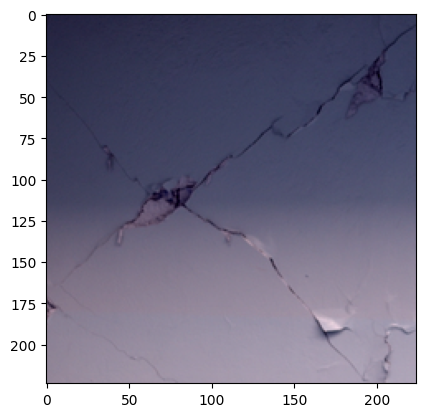

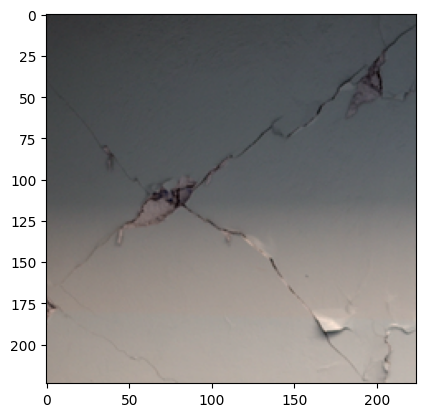

In [6]:
# Load the npy file
data = np.load("./DDD/data/task4_X_train.npy")

# Assuming data has shape (num_images, height, width, channels)
num_images = min(10, data.shape[0])  # Limit the number of images to 10

# Create a list to store the images
image_list = []

# Loop through the loaded data and append each image to the list
for i in range(num_images):
    image = data[i]
    image_list.append(image)

# image_list contains all the images from the npy file as numpy arrays

# Save each image in the list as a separate image file
for i, image in enumerate(image_list):
    file_name = f"image_{i+1}.png"  # You can choose any file format you prefer (e.g., png, jpg)
    #io.imsave(file_name, image)

# Use imread_collection to read the saved images into a collection object
imlist = io.imread_collection(["image_1.png"])       # , "image_2.png", "image_3.png", "image_4.png", "image_5.png"
print("Number of images read:", len(imlist))
res = np.zeros(shape=(1,3))
for i in range(len(imlist)):
    # re-size all images to 256 x 256 x 3
    m=transform.resize(imlist[i],(256,256,3))
    # re-shape to make list of RGB vectors.
    arr=m.reshape((256*256),3)
    # consolidate RGB vectors of all images
    res = np.concatenate((res,arr),axis=0)
res = np.delete(res, (0), axis=0)

# subtracting the mean from each dimension
m = res.mean(axis = 0)
res = res - m

R = np.cov(res, rowvar=False)
# print(R)

evals, evecs = LA.eigh(R)

idx = np.argsort(evals)[::-1]
evecs = evecs[:,idx]
# sort eigenvectors according to same index

evals = evals[idx]
# select the first 3 eigenvectors (3 is desired dimension
# of rescaled data array)

evecs = evecs[:, :3]
# make a matrix with the three eigenvectors as its columns.
evecs_mat = np.column_stack((evecs))
# carry out the transformation on the data using eigenvectors
# and return the re-scaled data, eigenvalues, and eigenvectors
m = np.dot(evecs.T, res.T).T

# perturbing color in image[0]
# re-scaling from 0-1
img = imlist[0]/255.0
tmp = np.array(img*255.0, np.int32)
data_aug(img)
#, evals, evecs_mat
fig=plt.figure()
plt.imshow(img)
#tmp = np.array(img*255.0, np.int32)
fig=plt.figure()
plt.imshow(tmp)
print(tmp.shape)
im = Image.fromarray(tmp.astype('uint8'))
im.save('test.png')






